In [21]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import matplotlib.pyplot as plt

%run definitions.ipynb

#from definitions import IsScalar, Thresh, Hamming, Perturb, check_binary_array, generate_array, update, Energy, stable_state, find_thresh, num_of_cross_talk



In [22]:
V = generate_array(3,1000)

#TEST
#V = np.array([
#    [1] * 20 + [0] * 80,
#    [0] * 80 + [1] * 20
#    ], dtype=int)

V.shape

(3, 1000)

In [23]:
while (1):
    V_not = Perturb(V,p=450)
    tempV = V_not@V_not.T
    is_diagonal = True 
    for i in range(tempV.shape[0]):
        for j in range(tempV.shape[1]):
            if i != j and tempV[i][j] >= 220:
                is_diagonal = False
                break

    if is_diagonal:
        break

V=V_not

n,N = np.shape(V)

print(V)
print(V@V.T)

att = np.sum(np.diag(V@V.T))/n
num = num_of_cross_talk(V)
th = find_thresh(V@V.T, num)
print(th)
print(att)
print(num)

[[1 1 1 ... 0 0 1]
 [1 1 0 ... 1 1 0]
 [1 1 0 ... 1 0 0]]
[[482 219 219]
 [219 464 205]
 [219 205 460]]
468.6666666666667
468.6666666666667
0.461522


In [40]:
b = np.zeros(n) #percent of masking

#W = (V.T@V)/n - np.eye(N)

W = np.zeros((N, N))

for vv in V:
    W += np.outer(vv, vv) #outer product of a state vector and itself (autocorrelation) one by one summed into the matrix

np.fill_diagonal(W, 0)
#W = W/np.sqrt(n)
print(W)

[[0. 3. 1. ... 2. 1. 1.]
 [3. 0. 1. ... 2. 1. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 ...
 [2. 2. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [41]:
P = Perturb(V, p=100)#perturbed input state matrix
k = 2 #np.random.randint(len(V))
#print(k)
in_k=P[k:k+1,]#perturbed input state
in_V_k=V[k:k+1,]# setting in_V_k to be from the k-th column to the (k+1)_th column thus only the k-th collumn since RHS of : is not included(excluded in the list)
in_V = np.reshape(in_V_k,(np.size(in_V_k),))

print('distance between perturbed input state and stored state: ', Hamming(in_k, in_V_k))
print()
en_in = Energy(W, in_k)
print('initial energy: ', en_in )

distance between perturbed input state and stored state:  [100.0]

initial energy:  [[-130078.]]


In [42]:
perm = np.arange(1000)
iter = 5
l = 0
e =  np.zeros(iter*len(perm))
for i in range(iter):
    random.shuffle(perm)
    for j in range(len(perm)):
        e[l] = Energy(W, in_k)
        c=perm[j]
        y = update(in_k, W, c, th-(att*0.09)) 
        #print('dist: ', Hamming(in_k, y), '  energy: ', Energy(W, b, y))
        l=l+1
        in_k = y     

#grid = in_k.reshape((4, 4))
#fig, ax = plt.subplots()
#ax.imshow(grid, cmap='gray')
#plt.show()
#print()
        
#print('last update: ', y)  
#print()
en_fin = Energy(W, in_k)
print('final energy: ', en_fin )
print()
print('distance between stable state and stored state: ', Hamming(in_k, in_V_k))
print()

stable_state(in_k, V)

final energy:  [[-101734.]]

distance between stable state and stored state:  [122.0]

spurious stable state reached


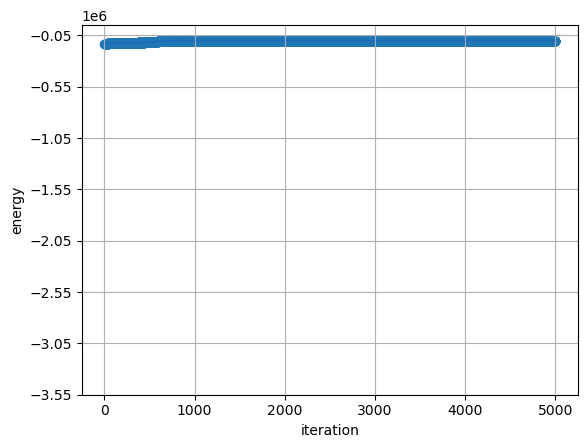

In [43]:
# Set the domain size
h = iter * len(perm)

# Generate the x-axis data points (domain)
dom = np.arange(h)

# Create the scatter plot
plt.scatter(dom, e)

# Interpolate the scatter plot using linear splines
spline = plt.plot(dom, e, 'b', linestyle='-', alpha=0.1)

# Set the axis labels
plt.xlabel('iteration')
plt.ylabel('energy')

# Set y-axis limits and ticks
y_ticks = np.arange(-3550000, 50000, 500000)
plt.ylim([-3550000, 50000])
plt.yticks(y_ticks)

# Display the plot
plt.grid(True)
plt.show() # energy from [[-3315368.47]] or [[-3262098.56]] to [[-12549090.72]]

print() 
